# <span style="color:#59afe1"> Marketing Campaign Analysis Data </span>

<div class="alert alert-info">
<b>Причина выбора датасета:</b>
    Я выбрала данный датасет, поскольку он отчасти связан с ВКР и позволит понять, какие факторы влияют на успех проведения маркетинговых кампаний, более того, он полезен и для других маркетинговых целей, например, для оценки эффективности проведенных кампаний 🙂
<br>
</div>

## Введение

Для принятия решений по организации маркетинговых кампаний необходимо понимать, какие факторы смогут повлиять на ее успех, от чего зависит купит ли клиент продукт или нет. 


**Цель анализа** - извлечь из данных полезную информацию, которая улучшит процесс принятия решений по маркетинговым кампаниям, а именно: определить факторы, способствующие успеху маркетинговой кампании

**Вопросы исследования**
* Выявить наиболее важные факторы, влияющие на успешность маркетинговой кампании
* Понять, как клиентские характеристики (возраст, пол и пр.) влияют на реакцию на маркетинговую кампанию
* Выявить, как влияет результаты по предыдущей маркетинговой кампании на реакцию в текущей
* Посмотреть, как коррелируют между собой переменные
* Отличается ли результаты реакции на маркетинговую кампанию в зависимости от месяца
* Влияет ли частота контактов на успешность кампании

## Описание данных

В данных содержатся как характеристики клиентов (пол, возраст, профессия и др.), так и характеристики проведенных маркетинговых кампаний (день, месяц, количество контактов и др.)

* `id` - идентификатор записи
* `target` - **целевая переменная (реакция клиента на маркетинговую кампанию)**
* `day` - день контакта в предыдущей кампании
* `month` - месяц контакта в предыдущей кампании
* `duration` - продолжительность контакта в предыдущей кампании
* `contactId` - идентификатор контакта
* `age` - возраст клиента
* `gender` - пол клиента
* `job` - профессия клиента
* `maritalStatus` - семейное положение клиента
* `education` - образование клиента
* `craditFailure` - если у клиента есть кредит по умолчанию
* `accountBalance` - остаток на счете клиента
* `house` - если у клиента есть дом
* `credit` - если у клиента есть кредит
* `contactType` - тип контакта
* `numberOfContacts` - количество контактов во время текущей кампании
* `daySinceLastCampaign` - дни после последнего контакта предыдущей кампании
* `numberOfContactsLastCampaign` - количество контактов во время предыдущей кампании
* `lastCampaignResult` - результат предыдущей кампании

In [1]:
#импортируем все необходимые библиотеки

import warnings #убираем предупреждения
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import statsmodels.api as sm

# Предобработка данных

Для анализа будем использовать файл train.csv, который уже содержит целевую переменную - target, файл test.csv будем использовать в дальнейшем для проверки моделей

In [2]:
#Импортируем данные из формата .csv и выводим первые 10 строк датафрейма 
mark_camp = pd.read_csv('train.csv', sep=',')
mark_camp.head(10)

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown
5,432147286,no,21,may,303,24232,37,male,technical,married,highSchool,no,5729,yes,no,unknown,3,NaN,0,unknown
6,432186620,yes,23,jul,251,24594,30,female,student,single,uniGraduated,no,3026,no,no,cellPhone,1,535.0,1,failure
7,432166789,no,17,nov,188,26432,35,male,manager,married,uniGraduated,no,209,yes,no,cellPhone,1,NaN,0,unknown
8,432146157,no,16,may,196,26559,37,male,worker,single,secondarySchool,no,117,yes,no,unknown,3,NaN,0,unknown
9,432166062,no,28,aug,147,28358,40,male,technical,married,highSchool,yes,0,no,no,cellPhone,2,NaN,0,unknown


In [3]:
#Посмотрим на общую информацию
mark_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

Можно заметить пропуски в колонке с днями после последнего контакта предыдущей кампании, а также, что не все названия в змеином регистре

Датафрейм состоит из:

1. Целочисленных переменных 8 шт.
2. Вещественных переменных 1 шт. (скорее всего из-за пропусков вещественный тип)
3. Строковых переменных 11 шт.

In [4]:
mark_camp.shape #Набор данных содержит 20 колонок и 31480 наблюдений

(31480, 20)

Колонки с id и contactId являются уникальными значениями, в дальнейшем анализе они не нужны, поэтому удалим их

In [5]:
mark_camp.drop(['id'], axis = 1, inplace = True)
mark_camp.drop(['contactId'], axis = 1, inplace = True)

### Работа с названиями колонок

In [6]:
#Посмотрим на названия колонок
mark_camp.columns

Index(['target', 'day', 'month', 'duration', 'age', 'gender', 'job',
       'maritalStatus', 'education', 'creditFailure', 'accountBalance',
       'house', 'credit', 'contactType', 'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign',
       'lastCampaignResult'],
      dtype='object')

In [7]:
#Переименуем столбцы в змеиный регистр

mark_camp.rename(columns = { 
                            'maritalStatus': 'marital_status',
                            'creditFailure': 'credit_failure',
                            'accountBalance': 'account_balance', 
                            'contactType': 'contact_type', 
                            'numberOfContacts': 'number_of_contacts', 
                            'daySinceLastCampaign': 'day_since_last_camp',
                            'numberOfContactsLastCampaign': 'number_of_contacts_last_camp',
                            'lastCampaignResult': 'last_camp_result'}, inplace = True)

mark_camp[:5] #для проверки переименования столбцов 

,target,day,month,duration,age,gender,job,marital_status,education,credit_failure,account_balance,house,credit,contact_type,number_of_contacts,day_since_last_camp,number_of_contacts_last_camp,last_camp_result
0,no,27,may,166,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,no,26,oct,183,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,no,5,jun,227,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,no,2,jun,31,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,no,15,may,1231,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


### Работа с дубликатами и пропусками

In [8]:
#Проверим, есть ли дубли в датасете
mark_camp.duplicated().value_counts()

False    31480
dtype: int64

Дубликаты отсутсвуют, посмотрим на пропуски

In [9]:
#Проверим, есть ли пропуски в датасете
mark_camp.isna().sum()

target                              0
day                                 0
month                               0
duration                            0
age                                 0
gender                              0
job                                 0
marital_status                      0
education                           0
credit_failure                      0
account_balance                     0
house                               0
credit                              0
contact_type                        0
number_of_contacts                  0
day_since_last_camp             25742
number_of_contacts_last_camp        0
last_camp_result                    0
dtype: int64

In [10]:
#Посмотрим на строки, где day_since_last_camp равняется нулю
mark_camp[mark_camp['day_since_last_camp'].isnull()]

,target,day,month,duration,age,gender,job,marital_status,education,credit_failure,account_balance,house,credit,contact_type,number_of_contacts,day_since_last_camp,number_of_contacts_last_camp,last_camp_result
0,no,27,may,166,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,no,26,oct,183,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,no,5,jun,227,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,no,2,jun,31,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,no,15,may,1231,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31471,no,10,jul,497,31,female,manager,married,uniGraduated,no,181,yes,no,cellPhone,1,NaN,0,unknown
31472,no,30,may,85,25,male,worker,single,secondarySchool,no,155,yes,no,unknown,4,NaN,0,unknown
31473,no,27,aug,103,43,female,houseWife,married,uniGraduated,no,0,no,no,cellPhone,6,NaN,0,unknown
31476,no,21,may,173,40,female,manager,single,secondarySchool,no,858,yes,no,unknown,1,NaN,0,unknown


Как видим, количество контактов и результаты по последней кампании в строках, где day_since_last_camp равняется нулю, показывают нам, что это клиенты, с которыми мы не взаимодействовали в предыдущую кампанию. 

В данном сллучае пропуски можно было бы чем-то заполнить, 0 не подходит, так как может интерпретирован, как то, что после предыдущей кампании клиенты сразу стали взаимодействовать с новой, поэтому заполним -1.

In [11]:
#Заполним пропуски -1, что означает, кто клиент не взаимодействовал с предыдущей кампанией
mark_camp['day_since_last_camp'] = mark_camp['day_since_last_camp'].fillna(-1)

mark_camp #проверим, исчезли ли пропуски

,target,day,month,duration,age,gender,job,marital_status,education,credit_failure,account_balance,house,credit,contact_type,number_of_contacts,day_since_last_camp,number_of_contacts_last_camp,last_camp_result
0,no,27,may,166,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,-1.0,0,unknown
1,no,26,oct,183,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,-1.0,0,unknown
2,no,5,jun,227,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,-1.0,0,unknown
3,no,2,jun,31,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,-1.0,0,unknown
4,no,15,may,1231,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,-1.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31475,yes,30,nov,1628,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
31476,no,21,may,173,40,female,manager,single,secondarySchool,no,858,yes,no,unknown,1,-1.0,0,unknown
31477,no,17,nov,422,51,female,worker,married,highSchool,no,1414,yes,no,unknown,3,186.0,2,failure
31478,no,29,aug,69,30,male,technical,married,uniGraduated,no,1,no,no,cellPhone,21,-1.0,0,unknown


### Выявление выбросов

Text(0.5, 0.98, 'Ящик с усами для количественных переменных')

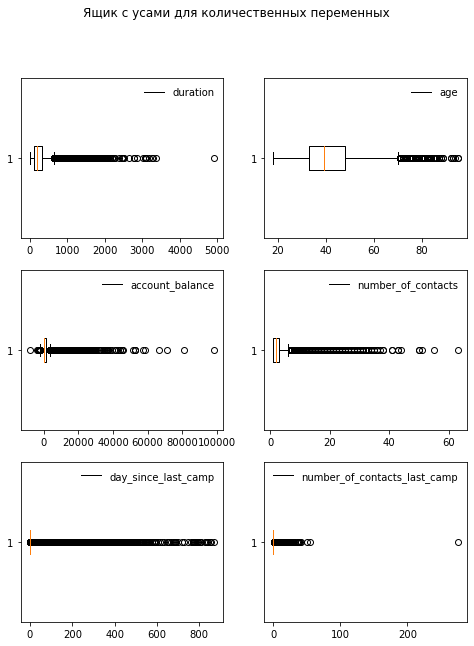

In [12]:
#Посмотрим на выбросы по количественным данным
fig, ax = plt.subplots(3,2, figsize=(8,10))

ax[0][0].boxplot(mark_camp['duration'],vert=False)
ax[0][1].boxplot(mark_camp['age'],vert=False)
ax[1][0].boxplot(mark_camp['account_balance'],vert=False)
ax[1][1].boxplot(mark_camp['number_of_contacts'],vert=False)
ax[2][0].boxplot(mark_camp['day_since_last_camp'],vert=False)
ax[2][1].boxplot(mark_camp['number_of_contacts_last_camp'],vert=False)

ax[0][0].legend(['duration'], frameon=False)
ax[0][1].legend(['age'], frameon=False)
ax[1][0].legend(['account_balance'], frameon=False)
ax[1][1].legend(['number_of_contacts'], frameon=False)
ax[2][0].legend(['day_since_last_camp'], frameon=False)
ax[2][1].legend(['number_of_contacts_last_camp'], frameon=False)

fig.suptitle('Ящик с усами для количественных переменных')

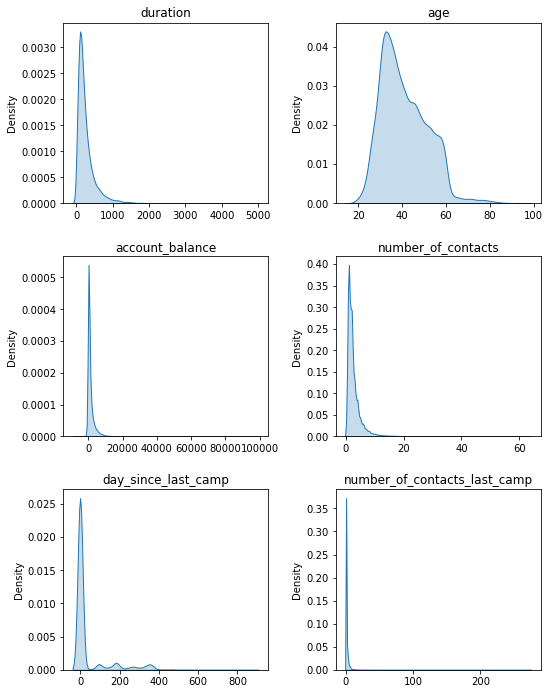

In [13]:
fig, ax = plt.subplots(3,2, figsize=(8,10))

sns.kdeplot(data=mark_camp, x="duration", fill=True, common_norm=False, palette="crest", ax = ax[0,0])
sns.kdeplot(data=mark_camp, x="age", fill=True,common_norm=False, palette="crest", ax = ax[0,1])
sns.kdeplot(data=mark_camp, x="account_balance", fill=True, common_norm=False, palette="crest", ax = ax[1,0])
sns.kdeplot(data=mark_camp, x="number_of_contacts", fill=True,common_norm=False, palette="crest", ax = ax[1,1])
sns.kdeplot(data=mark_camp, x="day_since_last_camp", fill=True, common_norm=False, palette="crest", ax = ax[2,0])
sns.kdeplot(data=mark_camp, x="number_of_contacts_last_camp", fill=True,common_norm=False, palette="crest", ax = ax[2,1])

ax[0,0].set_title('duration')
ax[0,1].set_title('age')
ax[1,0].set_title('account_balance')
ax[1,1].set_title('number_of_contacts')
ax[2,0].set_title('day_since_last_camp')
ax[2,1].set_title('number_of_contacts_last_camp')

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[2,1].set_xlabel('')
ax[2,0].set_xlabel('')


fig.tight_layout(pad=2)
plt.show()

Во всех распределениях есть выбросы: все графики скошены вправо. Однако, во многих данных нет оснований для чистки выбросов, так как выбросы в основном видны из-за скопления большей части наблюдений около нуля, чистить датасет по возрасту не является рациональным или значимым для исследования. Таким образом, для дальнейшего исследования отбросим выбросы только по длительности кампаний: уберем слишком длинные, так как они могут искажать дальнейшие исследования.

In [14]:
#Находим выбросы для переменной duration при помощи метода 3х сигм
mean_duration = mark_camp['duration'].mean()
std_duration  = mark_camp['duration'].std()
std_threshold_bottom_duration  = mean_duration - 3 * std_duration
std_threshold_top_duration  = mean_duration + 3 * std_duration
print(std_threshold_bottom_duration, std_threshold_top_duration)

-511.2322942441511 1028.2290540916733


In [15]:
#Находим количество выбросов по верхней границе
mark_camp[mark_camp['duration'] > std_threshold_top_duration].shape

(682, 18)

In [16]:
#Находим количество выбросов по нижней границе
mark_camp[mark_camp['duration'] < std_threshold_bottom_duration].shape

(0, 18)

In [17]:
#Фильтруем выбросы
mark_camp = mark_camp[mark_camp['duration'] < std_threshold_top_duration]

### Создание категориальных переменных

В датасете присутствует несколько колонок с уникальными значениями "yes", "no", для дальнейшего исследования созданим новые колонки, где переведем эти значения в категориальный тип, также поступим с полом, семейным положением

In [18]:
#добавим новые колонки, в которых перекодируем переменные в категориальные
mark_camp['target_1'] = pd.Categorical(mark_camp['target']) 
mark_camp['gender_1'] = pd.Categorical(mark_camp['gender'])
mark_camp['education_1'] = pd.Categorical(mark_camp['education'])
mark_camp['marital_status_1'] = pd.Categorical(mark_camp['marital_status'])
mark_camp['credit_failure_1'] = pd.Categorical(mark_camp['credit_failure'])
mark_camp['house_1'] = pd.Categorical(mark_camp['house'])
mark_camp['credit_1'] = pd.Categorical(mark_camp['credit'])

In [19]:
#проверим, как закодировались переменные

print('target_1: ', dict(enumerate(mark_camp['target_1'].cat.categories)))
print('gender_1: ', dict(enumerate(mark_camp['gender_1'].cat.categories)))
print('education_1: ', dict(enumerate(mark_camp['education_1'].cat.categories)))
print('marital_status_1: ', dict(enumerate(mark_camp['marital_status_1'].cat.categories)))
print('credit_failure_1: ', dict(enumerate(mark_camp['credit_failure_1'].cat.categories)))
print('house_1: ', dict(enumerate(mark_camp['house_1'].cat.categories)))
print('credit_1: ', dict(enumerate(mark_camp['credit_1'].cat.categories)))

target_1:  {0: 'no', 1: 'yes'}
gender_1:  {0: 'female', 1: 'male'}
education_1:  {0: 'highSchool', 1: 'secondarySchool', 2: 'uniGraduated', 3: 'unknown'}
marital_status_1:  {0: 'divorced', 1: 'married', 2: 'single'}
credit_failure_1:  {0: 'no', 1: 'yes'}
house_1:  {0: 'no', 1: 'yes'}
credit_1:  {0: 'no', 1: 'yes'}


Для удобства дальнейшего анализа выделим отдельно категориальные и количественные данные

In [20]:
numeric = ['day','duration', 'age', 'account_balance', 'number_of_contacts','day_since_last_camp',
           'number_of_contacts_last_camp']

cat = ['target_1','gender_1','education_1','marital_status_1','credit_failure_1',
       'house_1','credit_1']

# Описательные статистики и визуализация данных

Будем анализировать данные по двум группам: количественные, категориальные

<span style="color:#59afe1"> **Количественные данные**</span>

Для начала посмотрим на все описательные статистики для количественных переменных

In [21]:
mark_camp[numeric].describe()

,day,duration,age,account_balance,number_of_contacts,day_since_last_camp,number_of_contacts_last_camp
count,30798.000000,30798.000000,30798.000000,30798.000000,30798.000000,30798.000000,30798.000000
mean,15.814306,234.015033,40.937171,1344.924930,2.778654,40.377752,0.585265
std,8.328825,190.453128,10.623391,2973.866281,3.136844,100.662346,2.475884
min,1.000000,0.000000,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,8.000000,102.000000,33.000000,69.000000,1.000000,-1.000000,0.000000
50%,16.000000,176.000000,39.000000,439.000000,2.000000,-1.000000,0.000000
75%,21.000000,306.000000,48.000000,1405.750000,3.000000,-1.000000,0.000000
max,31.000000,1028.000000,95.000000,98417.000000,63.000000,871.000000,275.000000


**Выводы** по таблице с описательными статистиками:
* в среднем продолжительность взаимодействия с маркетинговой кампанией длится около 234 дней, что означает достаточно длительной взаимодействие клиентов 
* бОльшая часть выборки представлена клиентами в возрасте до 50 лет
* количество средст на счету сильно рознится: минимальное значение -8019, максиамальное 98417
* количество контактов как правило небольшое, 75% выборки взаимодействовали до 3 раз
* большая часть выборки не участвовала в предыдущей кампании

<span style="color:#59afe1"> **Категориальные данные**</span>

In [22]:
#Смотрим на описательные статистики
mark_camp[cat].describe()

,target_1,gender_1,education_1,marital_status_1,credit_failure_1,house_1,credit_1
count,30798,30798,30798,30798,30798,30798,30798
unique,2,2,4,3,2,2,2
top,no,male,highSchool,married,no,yes,no
freq,27508,15425,15844,18633,30248,17105,25909


**Выводы** по таблице с описательными статистиками:
* большая часть выборки негативно реагировала на проведенные маркетинговые кампании в прошлом
* мужчин в выборке больше, чем женщин
* около половины опрошенных закончили старшую школу
* чаще всего в выборке встречаются женатые/замужние люди
* в выборке подавляющее большинство не имело проблем с кредитом и не имеют кредит в настоящий момент

Наиболее интересной явлется целевая переменная, значение которой и хотелось бы уметь предугадывать, поэтому сгруппируем по данной переменной и также посмотрим на средние значения

In [23]:
#добавляем target к количественным и качественым данным
numeric_cat_target = numeric + cat + ['target'] 

mark_camp[numeric_cat_target].groupby('target').mean()

,day,duration,age,account_balance,number_of_contacts,day_since_last_camp,number_of_contacts_last_camp
target,,,,,,,
no,15.910753,210.115166,40.826705,1285.909117,2.866112,36.412862,0.507416
yes,15.007903,433.844073,41.860790,1838.361702,2.047416,73.528571,1.236170


**Выводы**:
* средняя продолжительность у тех, кто остался доволен маркетинговой кампанией выше, чем у негативных клиентов
* средний возраст примерно одинаковый - 41-42 года
* средний остаток на счете у позитивных клиентов чуть выше, чем у негативных, но незначительно
* стоит отметить, что контактов в текущей кампании у негтивных клиентов было чуть больше, чем у тех, кто остался довольным, при количество контакотов по сравнению с прошлой кампанией значительно увеличилось
* те, у кого прошло больше дней с последней кампании, чаще отвечали положительно

Text(0.5, 1.0, 'Распределение по типу контакта')

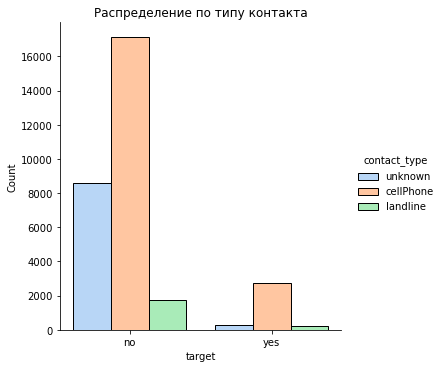

In [24]:
#Посмотрим, как распределялись ответы в зависимости от типа контакта взаимодействия
sns.displot(data = mark_camp, x = "target", hue ="contact_type", 
            height = 5,palette ="pastel",  multiple="dodge", shrink=.8)
plt.title("Распределение по типу контакта")

**Вывод**: Получается, что звонки на мобильные телефоны были наиболее популярны для связи в обоих случаях, несмотря на то, что в отрицательных отзывах есть также значительное количество нераспознанных типов контактов, можно сделать вывод, что тип связи не влиял на результат маркетинговой кампании

Еще одним предположением, выдвинутым в начале исследования, явлется то, что реакция на маркетинговую кампанию зависит от месяца проведения, проверим ее на графике

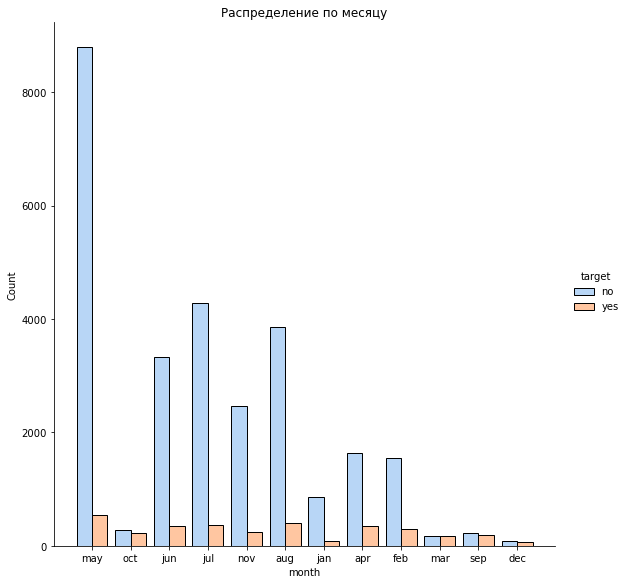

In [25]:
#Посмотрим, как распределялись ответы в зависимости от типа контакта взаимодействия
sns.displot(data = mark_camp, x = "month", hue ="target", 
            height = 8, palette ="pastel",  multiple="dodge", shrink=.8)
plt.title("Распределение по месяцу")
pass

**Вывод**: По гистограмме можно сделать вывод, что наиболее часто негативно проходит кампания в мае, но в мае и в общем количество контактов больше, чем в другие месяцы, наименьшее количество наблюдается в декабре. Если брать в соотношении негативные и позитивные реакции, то несмотря на то, что марте сентябре и декабре их по количеству меньше, шанс получить позитивный исход выше.

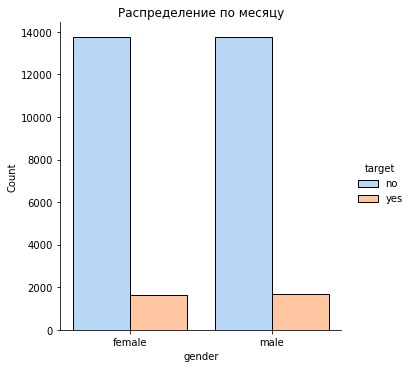

In [26]:
#Посмотрим, как распределялись ответы в зависимости от пола
sns.displot(data = mark_camp, x = "gender", hue ="target", 
            height = 5, palette ="pastel",  multiple="dodge", shrink=.8)
plt.title("Распределение по месяцу")
pass

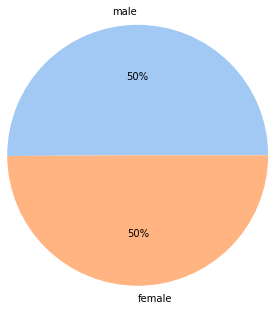

In [27]:
plt.pie(mark_camp.gender.value_counts(), labels = ['male', 'female'], radius= 1.5,
        colors = sns.color_palette("pastel"), autopct = '%1.f%%')
pass

**Вывод**: Пол абсолютно не влияет на значение переменной target, в выборке равное количество мужчин и женщин, при этом распределение на негативные и позитивные реакции также идентично.

Раннее по таблице со средними значниями уже было обозначено, что возраст примерно одинаковый у положительно ответивших и тех, кто отреагировал негативно, посмотрим еще раз это на графике

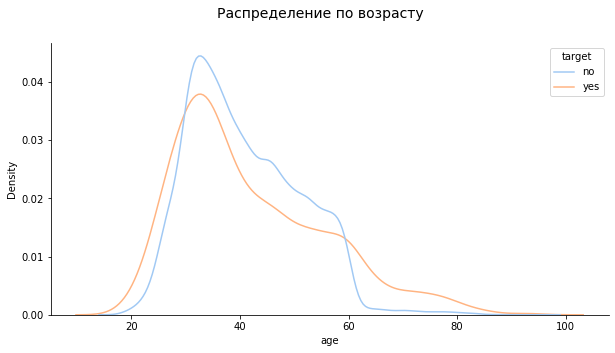

In [28]:
#Посмотрим, как распределялись ответы в зависимости от возраста
plt.figure(figsize = (10,5))
sns.kdeplot(data = mark_camp, x= "age", hue = "target", common_norm = False, palette ="pastel")

plt.suptitle("Распределение по возрасту", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

**Вывод**: Распределение по возрасту в целом похоже, единственное, можно отметить, что до примерно 30 лет вероятность положительной реакции выше, также как и после 60 лет, то есть при проведении маркетинговых кампаний шанс положительного исхода в данных возрастных группах выше

Посмотрим, как распределялись ответы в зависимости от продолжительности маркетинговой кампании

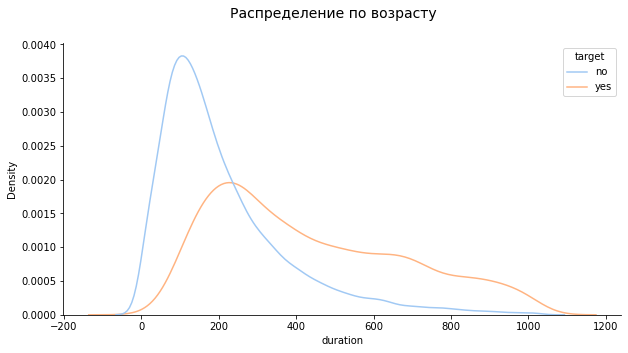

In [29]:
#Посмотрим, как распределялись ответы в зависимости от типа контакта взаимодействия
plt.figure(figsize = (10,5))
sns.kdeplot(data = mark_camp, x= "duration", hue = "target", common_norm = False, palette ="pastel")

plt.suptitle("Распределение по возрасту", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

**Вывод**: получается, чем дольше продолжительность контакта, тем выше шанс на то, что кампания будет успешной, при этом вероятность в разы повышается после примерно 250 дня.

### Корреляция

Посмотрим на корреляцию между показателями

In [30]:
#Расчитываем коэффициенты корреляции
corr = mark_camp.corr().loc[numeric, numeric]

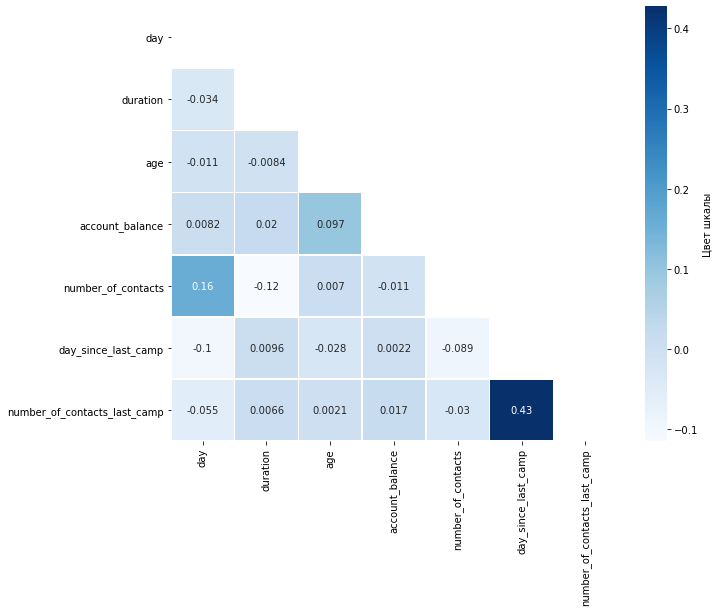

In [31]:
#Строим корреляционную матрицу
fig , ax = plt.subplots(figsize = (10,8))

mask = np.triu(corr)

sns.heatmap(corr, mask = mask,
            linewidths=0.5, annot=True,cmap='Blues',
            linecolor="white", annot_kws = {'size':10}, 
            cbar_kws = {'label': 'Цвет шкалы'})
pass

**Вывод**: между количественными переменными корреляция низкая, наибольшее значение 0,43 между количеством контактов по предыдущей кампании и количеством дней с предыдущей кампании, можно предположить, что раньше в маркетинговых кампаниях было больше взаимодействий с клиентами.

In [32]:
#для удобства создадим еще одну колонку с переводом в целочисленные значения переменной target и last_camp_result
def translate(t):
    if t == 'yes':
        return 1
    else:
        return 0

mark_camp['target_bul'] = mark_camp['target'].apply(translate)


def translate_1(g):
    if g == 'success':
        return 1
    else:
        return 0

mark_camp['last_camp_result_bul'] = mark_camp['last_camp_result'].apply(translate_1)

In [33]:
mark_camp = mark_camp.astype({ 'target_bul': 'int64', 'last_camp_result_bul':'int64'})

In [34]:
mark_camp.corrwith(mark_camp['target_bul']).sort_values(ascending=False)

target_bul                      1.000000
duration                        0.362866
last_camp_result_bul            0.317494
day_since_last_camp             0.113894
number_of_contacts_last_camp    0.090921
account_balance                 0.057383
age                             0.030068
day                            -0.033485
number_of_contacts             -0.080620
dtype: float64

**Вывод**: наибольшая завсисимость наблюдается между целевой перемнной и длительностью кампании, а также между результатом за предыдущую кампанию. Получается, что реакция на данную кампанию зависит от предыдущего опыта взаимодействия.

# Тестирование гипотез

### Непараметрические критерии

#### Критерий хи-квадрат Пирсона

Выберем некоторые категориальные переменные и проверим следующие гипотезы

<div style="border:solid lightblue 3px; padding: 20px">

<span style="color:#59afe1">**Гипотезы**</span>

1. **H0**: реакция на маркетинговую кампанию зависит от семейного статуса

   **H1**: нет связи между семейным статусом и реакцией на маркетинговую кампанию


2. **H0**: реакция на маркетинговую кампанию зависит от образования

   **H1**: нет связи между образованием и реакцией на маркетинговую кампанию

    
3. **H0**: реакция на маркетинговую кампанию зависит от пола

   **H1**: нет связи между полом и реакцией на маркетинговую кампанию



In [35]:
#Гипотеза 1
#группируем по переменным
ct_marital = mark_camp.groupby('target_1')['marital_status_1'].value_counts().unstack()
ct_marital

marital_status_1,divorced,married,single
target_1,,,
no,3079,16914,7515
yes,379,1719,1192


In [36]:
#смотрим на хи-квадрат
scipy.stats.chi2_contingency(ct_marital, correction=False)

(124.28028562670988,
 1.0300987768360714e-27,
 2,
 array([[ 3088.59874018, 16642.52756673,  7776.8736931 ],
        [  369.40125982,  1990.47243327,   930.1263069 ]]))

**Вывод**: Хи-квадрат больше критического значения, поэтому H0 отвергается, зависимость между семейным статусом и реакцией на маркетинговую кампанию есть

In [37]:
#Гипотеза 2
#группируем по переменным
ct_education = mark_camp.groupby('target_1')['education_1'].value_counts().unstack()
ct_education

education_1,highSchool,secondarySchool,uniGraduated,unknown
target_1,,,,
no,14337,4303,7740,1128
yes,1507,350,1284,149


In [38]:
#смотрим на хи-квадрат
scipy.stats.chi2_contingency(ct_education, correction=False)

(191.7197675712378,
 2.5947931263484057e-41,
 3,
 array([[14151.46282226,  4155.94272355,  8060.01013053,  1140.58432366],
        [ 1692.53717774,   497.05727645,   963.98986947,   136.41567634]]))

**Вывод**: Хи-квадрат больше критического значения, поэтому H0 отвергается, зависимость между образованием и реакцией на маркетинговую кампанию есть

In [39]:
#Гипотеза 3
#группируем по переменным
ct_gender = mark_camp.groupby('target_1')['gender_1'].value_counts().unstack()
ct_gender

gender_1,female,male
target_1,,
no,13753,13755
yes,1620,1670


In [40]:
#смотрим на хи-квадрат
scipy.stats.chi2_contingency(ct_gender, correction=False)

(0.6722278391061176,
 0.41227595762050784,
 1,
 array([[13730.77745308, 13777.22254692],
        [ 1642.22254692,  1647.77745308]]))

**Вывод**: Хи-квадрат меньше критического значения, поэтому H0 принимается, зависимости между полом и реакцией на маркетинговую кампанию нет

### Параметрические критерии

#### t-тест

<div style="border:solid lightblue 3px; padding: 20px">

<span style="color:#59afe1">**Гипотезы**</span>

**H0**: нет разницы между возрастом клиентов и реакцией на маркетинговую кампанию

**H1**: существует статистически значимые различия в реакциях в зависимости от среднего возраста клиентов

In [41]:
positive = mark_camp[mark_camp['target_bul'] == 1]['age']
negative = mark_camp[mark_camp['target_bul'] == 0]['age']

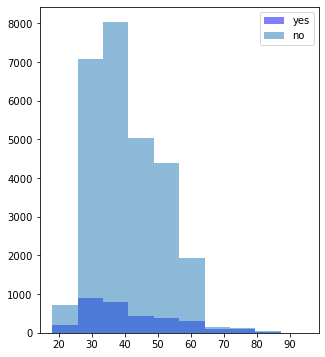

In [42]:
#Смотрим на нормальность распределения
fig, ax = plt.subplots(1,1, figsize=(5,6))
plt.hist(positive, alpha = 0.5, label='yes', color = 'b')
plt.hist(negative, alpha = 0.5, label='no')
plt.legend(loc='upper right')

plt.show()

Обе выборки смещены вправо, нужна нормализация данных

<Figure size 432x288 with 0 Axes>

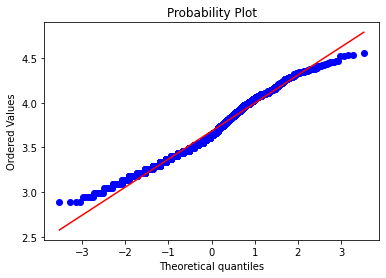

<Figure size 432x288 with 0 Axes>

In [43]:
positive_log = np.log(positive)

stats.probplot(positive_log, plot = plt)
plt.figure()

<AxesSubplot:>

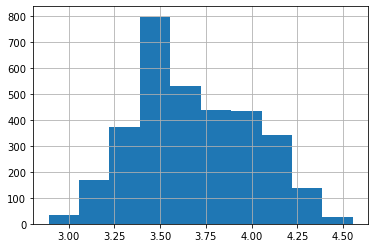

In [44]:
positive_log.hist()

<Figure size 432x288 with 0 Axes>

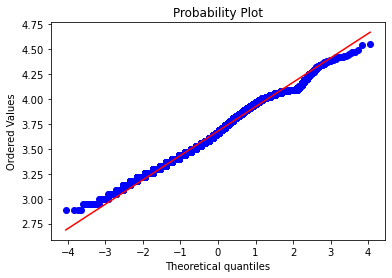

<Figure size 432x288 with 0 Axes>

In [45]:
negative_log = np.log(negative)

stats.probplot(negative_log, plot = plt)
plt.figure()

<AxesSubplot:>

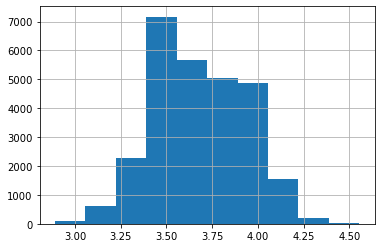

In [46]:
negative_log.hist()

In [47]:
p_value = scipy.stats.ttest_ind(negative_log, positive_log, equal_var=False)
p_value

Ttest_indResult(statistic=-0.7919420380134851, pvalue=0.42844413836892026)

**Вывод**: pvalue получается слишком большим, откуда следует, что Н0 принимаем, нет разницы между средним возрастом клиентов и реакцией на маркетинговую кампанию

### Линейная регрессия

Как было отмечено раннее по матрице корреляции, между количественными переменными в нашей выборке свзяь очень маленькая, наибольшая между количеством контактов по предыдущей кампании и количеством дней с предыдущей кампании, но и она составляет 0,43, что не является показателем сильной взаимосвязи

Далее рассмотрим зависимости на графиках рассеивания

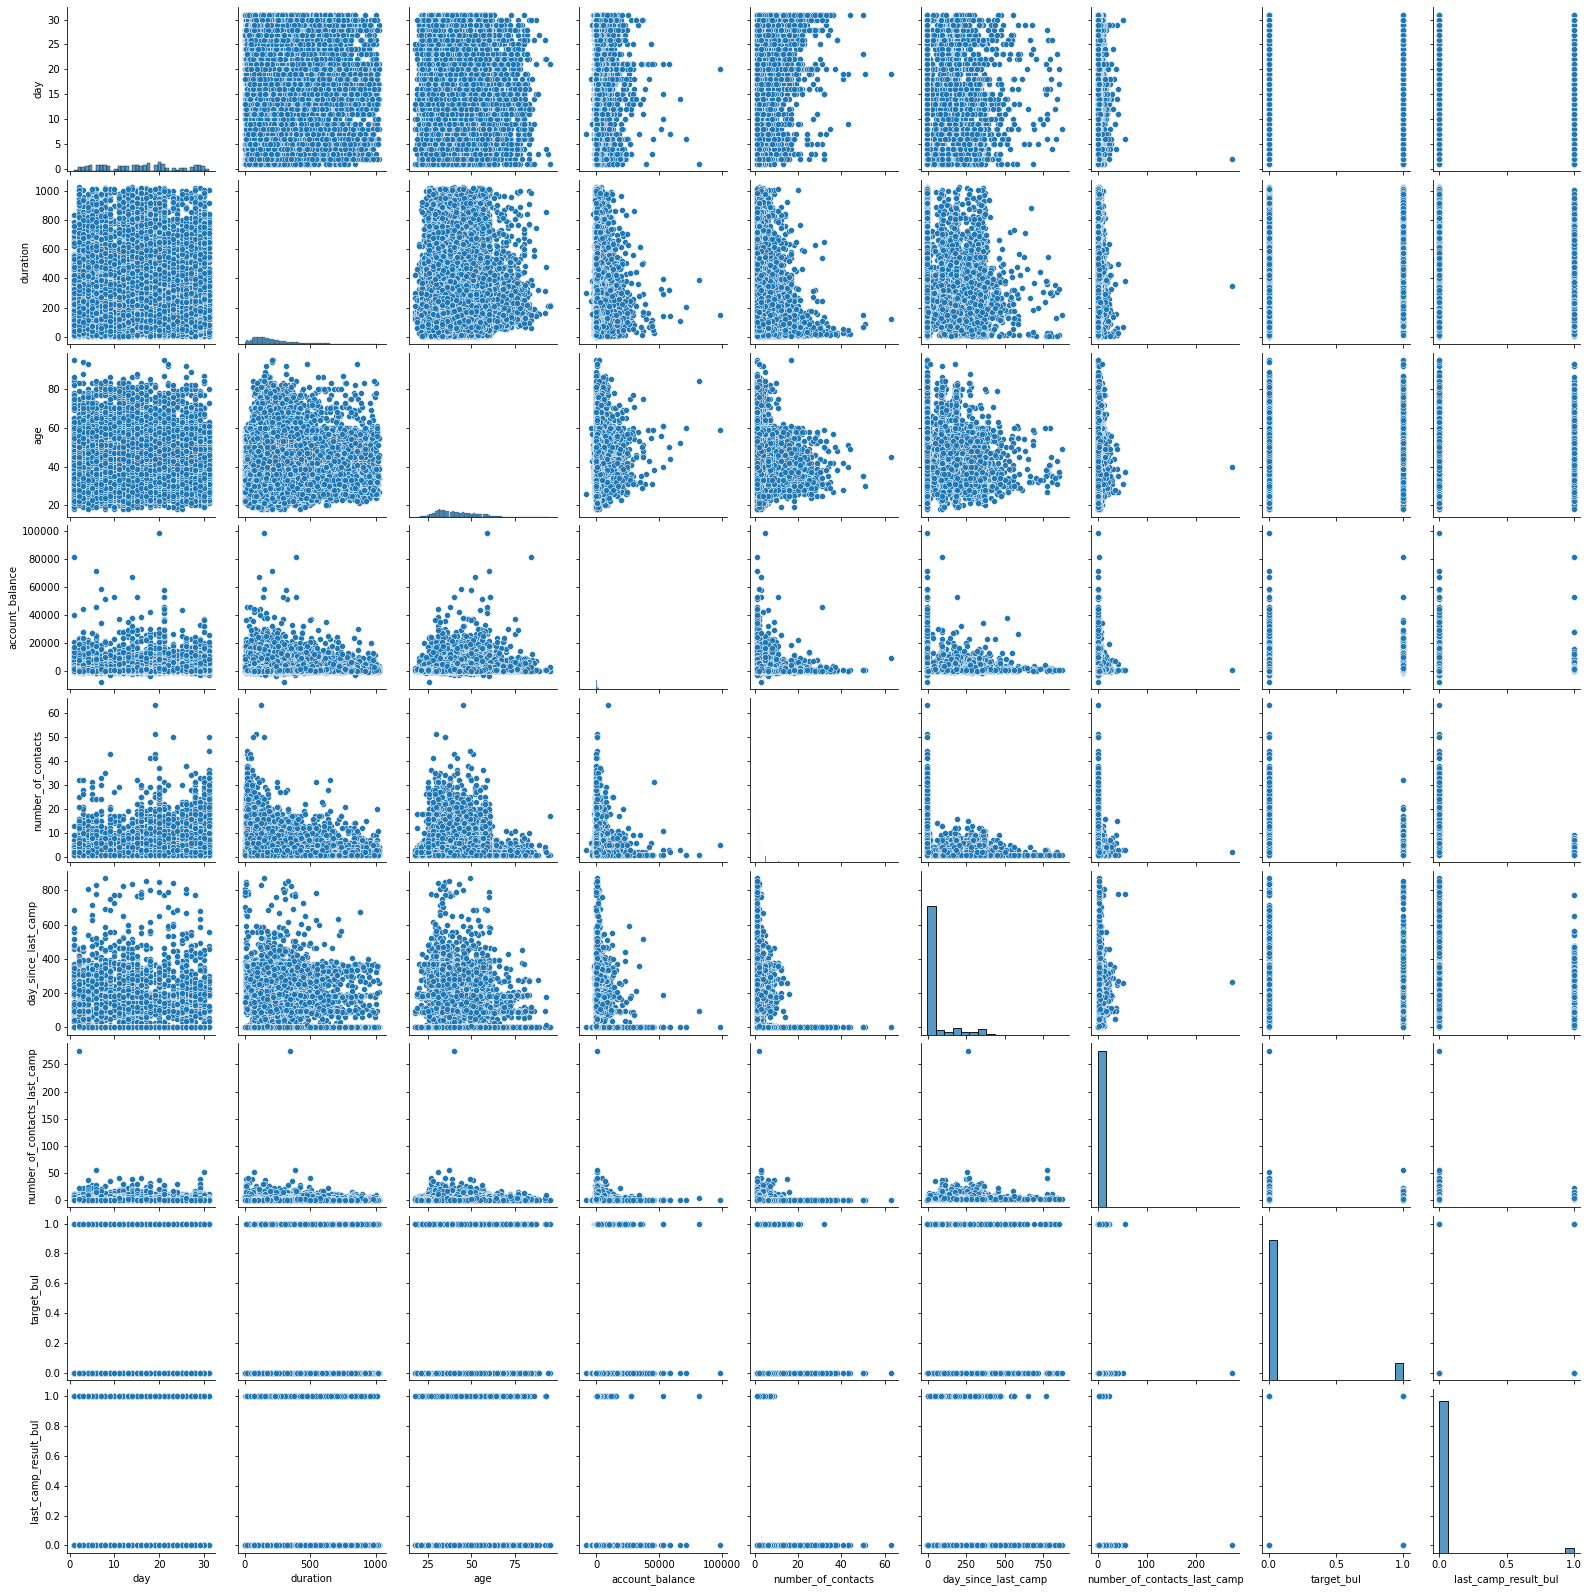

In [48]:
sns.pairplot(mark_camp)

Видно, что модель линейной регрессии подходит, так как между данными нет зависимостей

Для данного датасета достаточно тяжело подобрать какие-либо варианты комбинации переменных для построения линейной регрессии, но в рамках учебного проекта попробую это сделать. Построим линейную модель с одним предиктором: количество дней продолжительности контакта в зависимости от количества средств на балансе

In [49]:
X = mark_camp['account_balance']
y = mark_camp['duration']

res = scipy.stats.linregress(X, y)
res

LinregressResult(slope=0.001312855724616301, intercept=232.24934104995063, rvalue=0.020499833323858414, pvalue=0.0003208938945514248, stderr=0.0003648616711107907, intercept_stderr=1.1908369826204277)

При увеличении средств на счету на 1 единицу, продолжительность взаимодействия увеличится на 0.0013

In [50]:
#Вычислим коэфф детерминации
r_sq = res.rvalue ** 2
r_sq

0.00042024316630597593

По коэффициенту детерминации видно, что модель плохая, объяснет лишь 0,04% дисперсии целевой переменной

Коэффицент детерминации не особо показательный, но для окончания общей логики построения линейной регрессии закончу с данной моделью, хоть и статистически она не является значимой

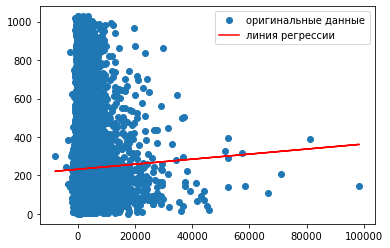

In [51]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')

plt.legend()
plt.show()

In [52]:
X_simple = mark_camp['account_balance']
y = mark_camp['duration']
X_simple_constant = sm.add_constant(X_simple)

mod = sm.OLS(y, X_simple_constant)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.95
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           0.000321
Time:                        23:31:33   Log-Likelihood:            -2.0536e+05
No. Observations:               30798   AIC:                         4.107e+05
Df Residuals:                   30796   BIC:                         4.108e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             232.2493      1.191    1

Модель получилась плохой и незначимой, но при попытках построить на каких-либо других данных в данном датасете ничего не выходило значимого по линейной регрессии

### Логистическая регрессия

Для построения логистической регрессии возьмем целевую переменную - реакция на маркетинговую кампанию, в качестве предиктора результат предыдущей кампании

In [53]:
X = mark_camp['last_camp_result_bul']
y = mark_camp['target_bul']

X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.311262
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             target_bul   No. Observations:                30798
Model:                          Logit   Df Residuals:                    30796
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.08406
Time:                        23:31:33   Log-Likelihood:                -9586.2
converged:                       True   LL-Null:                       -10466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.3295      0.020   -114.302      0.000      -2.369      -2.290
last_camp_result_bul     2.8953      0.068     42.340      0.000       2.761       3.029
========================================================================================
"""

In [54]:
c1, c2 = np.exp(-2.3295), np.exp(2.8953)
c1, c2

(0.09734440712707318, 18.088927305529076)

Таким образом, если предиктор равен 0, то есть если предыдущая кампания была неудачной, то вероятность, что данная кампания будет успешной 0,097, если же наоброт, прошлая кампания была успешной, то шанс, что и текущая кампания оставит положительную реакцию увеличвается в 18 раз

In [55]:
X = mark_camp[numeric]
y = mark_camp['target_bul']

X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.276660
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             target_bul   No. Observations:                30798
Model:                          Logit   Df Residuals:                    30790
Method:                           MLE   Df Model:                            7
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.1859
Time:                        23:31:33   Log-Likelihood:                -8520.6
converged:                       True   LL-Null:                       -10466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.8061      0.098    -38.968      0.000      -3.998      -3.615
day                             -0.0042      0.003     -1.676      0.094      -0.009       0.001
duration                         0.0047   8.74e-05     53.972      0.000       0.005       0.005
age                              0.0097      0.002      5.322      0.000       0.006       0.013
account_balance               4.325e-05   5.41e-06      7.994      0.000    3.26e-05    5.39e-05
number_of_contacts              -0.1503      0.013    -11.724      0.000      -0.175      -0.125
day_since_last_camp              0.0024      0.000     12.535      0.000       0.002       0.003
number_of_contacts_last_camp     0.0778      0.009      8.592      0.000       0.060       0.096
================================================================================================
"""

Коэффициент псевдо детерминации вырос, что говорит, что данная модель лучше объяснет отношения между переменными, при этом значимы все переменные, кроме day, соответсвенно интерпретируем результаты

In [56]:
print('duration:', np.exp(0.0047))
print('age:', np.exp(0.0097))
print('account_balance:', np.exp(4.325e-05))
print('number_of_contacts:', np.exp(-0.1503))
print('day_since_last_camp:', np.exp(0.0024))
print('day_since_last_camp:', np.exp(0.0778))

duration: 1.0047110623241844
age: 1.0097471974817553
account_balance: 1.0000432509352948
number_of_contacts: 0.8604498027601163
day_since_last_camp: 1.002402882305383
day_since_last_camp: 1.0809064557593608


В большинстве переменные соотносятся 1 к 1, что означает, что каждая 1 не особо влияет на изменение реакции на кампанию, при этом стоит отметить, что каждая еденица контакта понижает шанс положительной реакции на маркетинговую кампанию, что может означать, что клиентам надоедеает слишком частые взаимодействия

In [57]:
#Центрирование, посмотрим относительно средних значений
X = mark_camp[numeric] - mark_camp[numeric].mean()
y = mark_camp['target_bul']

X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.276660
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             target_bul   No. Observations:                30798
Model:                          Logit   Df Residuals:                    30790
Method:                           MLE   Df Model:                            7
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.1859
Time:                        23:31:33   Log-Likelihood:                -8520.6
converged:                       True   LL-Null:                       -10466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.5892      0.026   -100.695      0.000      -2.640      -2.539
day                             -0.0042      0.003     -1.676      0.094      -0.009       0.001
duration                         0.0047   8.74e-05     53.972      0.000       0.005       0.005
age                              0.0097      0.002      5.322      0.000       0.006       0.013
account_balance               4.325e-05   5.41e-06      7.994      0.000    3.26e-05    5.39e-05
number_of_contacts              -0.1503      0.013    -11.724      0.000      -0.175      -0.125
day_since_last_camp              0.0024      0.000     12.535      0.000       0.002       0.003
number_of_contacts_last_camp     0.0778      0.009      8.592      0.000       0.060       0.096
================================================================================================
"""

Модель в целом не сильно поменялась, поэтому отдельной интерпертации не требуется

<div style="border:solid lightblue 3px; padding: 20px">
<b>Выводы:</b>
    
* в среднем продолжительность взаимодействия с маркетинговой кампанией длится около 234 дней, что означает достаточно длительной взаимодействие клиентов 
* количество контактов как правило небольшое, 75% выборки взаимодействовали до 3 раз
* большая часть выборки негативно реагировала на проведенные маркетинговые кампании в прошлом
* тип связи не влиял на результат маркетинговой кампании
* наиболее часто негативно проходит кампания в мае, но в мае и в общем количество контактов больше, чем в другие месяцы, наименьшее количество наблюдается в декабре
* в марте сентябре и декабре их по количеству меньше, шанс получить позитивный исход выше
* пол абсолютно не влияет на исход кампании
* чем дольше продолжительность контакта, тем выше шанс на то, что кампания будет успешной, при этом вероятность в разы повышается после примерно 250 дня
* реакция на данную кампанию зависит от предыдущего опыта взаимодействия ( если предыдущая кампания была неудачной, то вероятность, что данная кампания будет успешной 0,097, если же наоброт, прошлая кампания была успешной, то шанс, что и текущая кампания оставит положительную реакцию увеличвается в 18 раз)
* зависимость между образованием и семейным статусом и реакцией на маркетинговую кампанию есть
* нет разницы между средним возрастом клиентов и реакцией на маркетинговую кампанию, но можно отметить, что до примерно 30 лет вероятность положительной реакции выше, также как и после 60 лет, то есть при проведении маркетинговых кампаний шанс положительного исхода в данных возрастных группах выше